# **Hiyerarşik Kümeleme**

*Hiyerarşik kümeleme, yukarıdan aşağıya doğru önceden belirlenmiş bir sıralamaya sahip kümeler oluşturmayı içerir. Örneğin, sabit diskteki tüm dosya ve klasörler bir hiyerarşi içinde düzenlenir. İki tür hiyerarşik kümeleme vardır: Bölücü ve Toplayıcı.*

***Bölücü yöntem***

*Bu yöntemde tüm gözlemleri tek bir kümeye atarız ve ardından kümeyi en az benzer iki kümeye böleriz. Son olarak, her gözlem için bir küme olana kadar her küme üzerinde özyinelemeli olarak ilerliyoruz.*

***Aglomeratif yöntem***

*Bu yöntemde her gözlemi kendi kümesine atarız. Ardından, kümelerin her biri arasındaki benzerliği (örneğin, mesafe) hesaplayın ve en benzer iki kümeyi birleştirin. Son olarak, sadece tek bir küme kalana kadar 2. ve 3. adımları tekrarlayın.*

# **Bağlantı veya mesafe matrisi**

*Herhangi bir kümeleme gerçekleştirilmeden önce, bir mesafe fonksiyonu kullanılarak her nokta arasındaki mesafeyi içeren yakınlık matrisinin belirlenmesi gerekir. Ardından, matris her bir küme arasındaki mesafeyi gösterecek şekilde güncellenir. Aşağıdaki üç yöntem, her bir küme arasındaki mesafenin nasıl ölçüldüğü konusunda farklılık göstermektedir.*

***Tek Bağlantı***

*Tek bağlantılı hiyerarşik kümelemede, iki küme arasındaki mesafe, her bir kümedeki iki nokta arasındaki en kısa mesafe olarak tanımlanır. Örneğin, sol taraftaki "r" ve "s" kümeleri arasındaki mesafe, en yakın iki noktaları arasındaki okun uzunluğuna eşittir.*

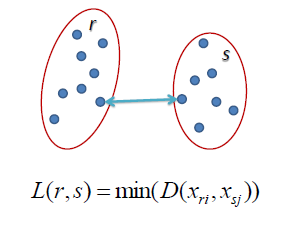

***Komple Bağlantı***

*Tam bağlantılı hiyerarşik kümelemede, iki küme arasındaki mesafe, her bir kümedeki iki nokta arasındaki en uzun mesafe olarak tanımlanır. Örneğin, sol taraftaki "r" ve "s" kümeleri arasındaki mesafe, en uzak iki noktaları arasındaki okun uzunluğuna eşittir.*

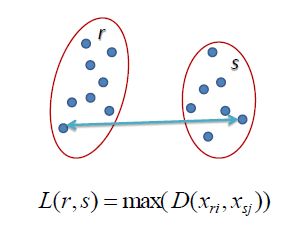

***Ortalama Bağlantı***

*Ortalama bağlantı hiyerarşik kümelemede, iki küme arasındaki mesafe, bir kümedeki her noktanın diğer kümedeki her noktaya olan ortalama mesafesi olarak tanımlanır. Örneğin, sol taraftaki "r" ve "s" kümeleri arasındaki mesafe, bir kümenin noktalarını diğerine bağlayan her bir okun ortalama uzunluğuna eşittir.*

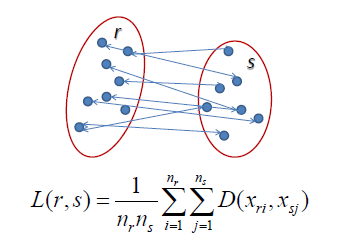



# **Dendogramlar**

*Dendogramlar, hiyerarşik kümeleme tarafından üretilen kümelerin düzenini göstermek için sıklıkla kullanılan ağaç diyagramlarıdır. Kümeler ne kadar benzer (veya benzemez) olduklarına göre düzenlenir. Aynı yüksekliğe yakın olan kümeler birbirine benzer; farklı yükseklikteki kümeler ise benzemez - yükseklik farkı ne kadar büyükse benzemezlik de o kadar fazla olur.*

*Ünlü Iris veri setini içeren bir örnek aşağıda gösterilmiştir.*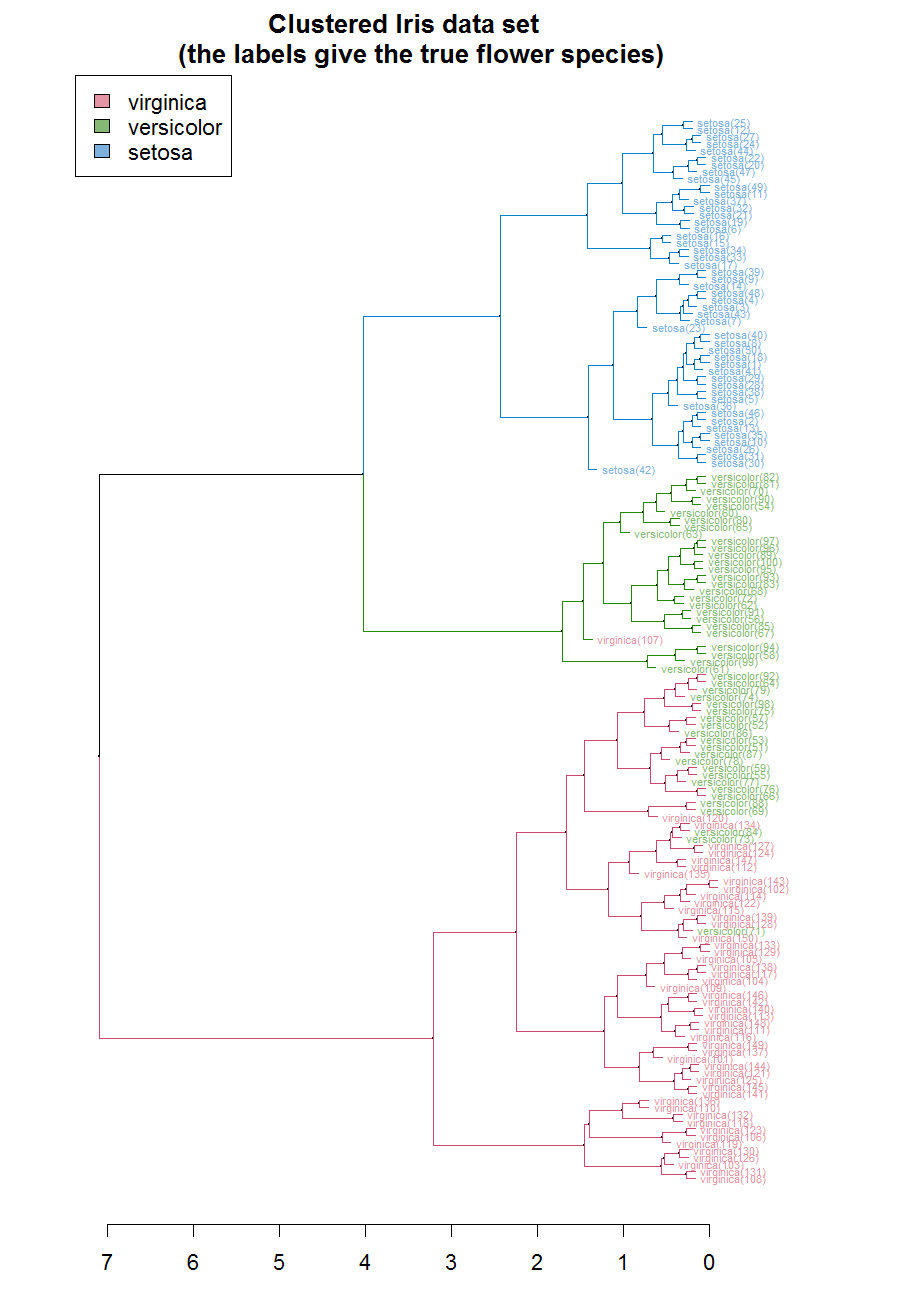

# **Alışveriş trendi veri seti ile kümeleme**

In [20]:
pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# **Veri setini okuyun**

In [22]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


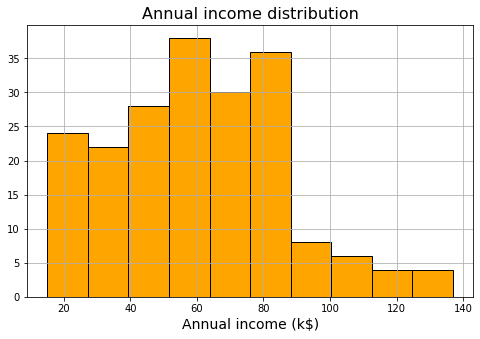

In [24]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution", fontsize=16)
plt.xlabel("Annual income (k$)", fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'], color='orange', edgecolor='k')
plt.show()

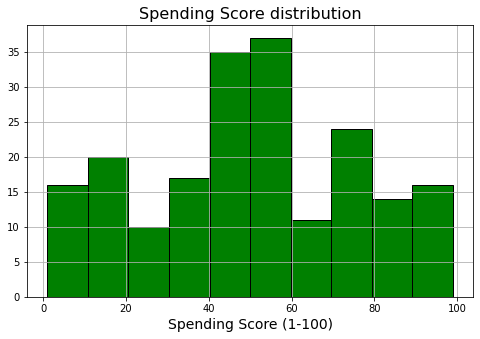

In [25]:
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution", fontsize=16)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'], color='green', edgecolor='k')
plt.show()

# **Peki, yıllık gelir ile harcama puanı arasında kesin bir korelasyon var mı? - Görünüşe göre değil**

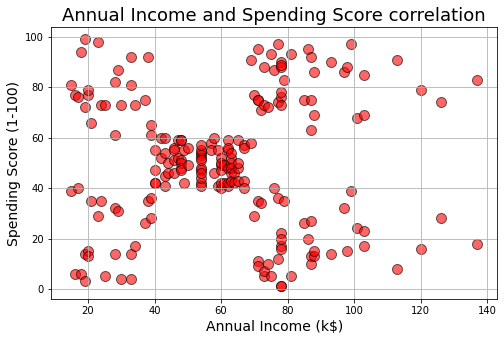

In [26]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation", fontsize=18)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='red',edgecolor='k', alpha=0.6, s=100)
plt.show()

# **Yaş ve harcama puanı arasındaki korelasyona ne dersiniz? - Görünüşe göre değil**

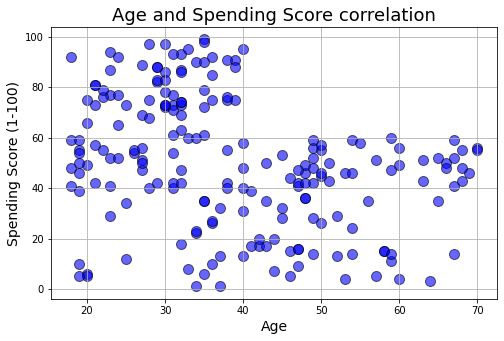

In [27]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Spending Score (1-100)", fontsize=14)
plt.grid(True)
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='blue', edgecolor='k', alpha=0.6, s=100)
plt.show()

# **Strateji**

***Bu nedenle, alışveriş merkezinin hedefleyebileceği farklı kümeler olup olmadığını görmek için müşterileri yıllık gelirlerine ve harcama puanlarına göre sınıflandırmayı araştıracağız.***

***K-ortalamalar kullanabiliriz ancak gizli küme sayısı hakkında herhangi bir fikrimiz yok. Dendogramlarla hiyerarşik kümelemenin bize en uygun küme sayısı hakkında iyi bir fikir vereceğini göreceğiz.***

# **Dendogramlar**

In [28]:
X = df.iloc[:,[3,4]].values

# **Ward mesafe matrisi**

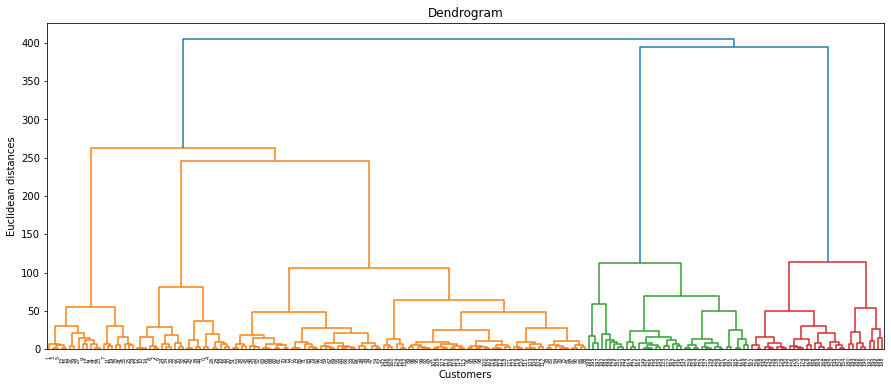

In [29]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

# **Optimum küme sayısı**

***Genellikle, optimum küme sayısı bir Dendogramdan basit bir şekilde bulunabilir.***

▶ *Herhangi bir *uzatılmış* yatay çizgi tarafından kesilmeyen en uzun dikey çizgi uzantısını bulun (burada uzatılmış yatay çizgiler anlamına gelir, yani küme bölücüler her iki yöne doğru sonsuza kadar uzatılır).*

▶ *Şimdi bu çizgi üzerindeki herhangi bir noktayı alın ve hayali bir yatay çizgi çizin.*

▶ *Bu hayali çizginin kaç tane dikey çizgiyi kestiğini sayın.*

▶ *Bu muhtemelen en uygun küme sayısı olacaktır.*

***Bu fikir aşağıdaki şekilde gösterilmektedir. Burada optimum küme sayısı 5 olabilir.***


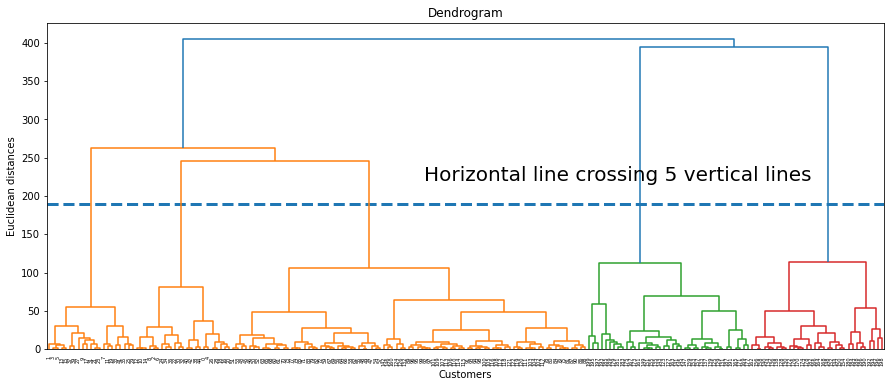

In [30]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190, xmin=0, xmax=2000, lw=3, linestyles='--')
plt.text(x=900, y=220, s='Horizontal line crossing 5 vertical lines', fontsize=20)

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

# **Hiyerarşik Kümeleme**


# **Modeli oluşturun**

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



# **Kümeleri çizin ve müşteri türlerini etiketleyin**

▶ *Dikkatli olun - yüksek gelirli ancak düşük harcama yapanlar*

▶ *Standart - orta gelirli ve orta harcama yapanlar*

▶ *Hedef kitle - orta ila yüksek gelirli ve yüksek harcama yapanlar (alışveriş merkezi tarafından hedeflenmelidir)*

▶ *Dikkatsiz - düşük gelirli ancak yüksek harcama yapanlar (olası kredi riski nedeniyle kaçınılmalıdır)*

▶ *Mantıklı - düşük gelirli ve düşük harcama yapanlar*

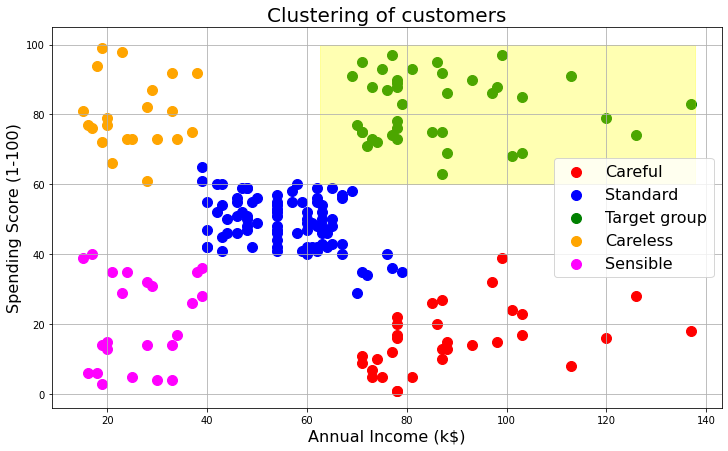

In [33]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c ='blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c ='green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering of customers', fontsize = 20)
plt.xlabel('Annual Income (k$)', fontsize = 16)
plt.ylabel('Spending Score (1-100)', fontsize = 16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin = 60, ymax = 100, xmin = 0.4, xmax = 0.96, alpha = 0.3, color = 'yellow')
plt.show()



# **K-ortalamalar algoritması ile optimum küme sayısının doğrulanması**

***Küme sayısı (1 ila 15) üzerinde yinelenen k-means++ modelini (dikkatlice başlatılmış merkezcilere sahip k-means) çalıştırıyoruz ve dirsek yöntemiyle optimum küme sayısını belirlemek için *küme içi kareler toplamı (WCSS) matrisini* çiziyoruz.***

In [35]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

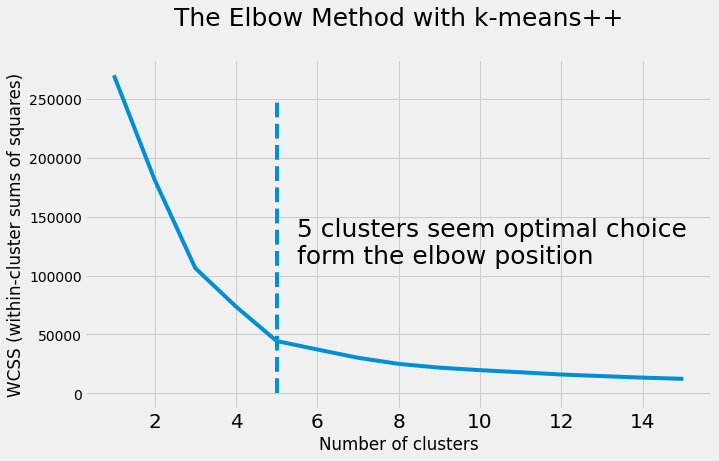

In [36]:
wcss = []
for i in range(1, 16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, 16), wcss)
  plt.title('The Elbow Method with k-means++\n', fontsize = 25)
  plt.xlabel('Number of clusters')
  plt.xticks(fontsize = 20)
  plt.ylabel('WCSS (within-cluster sums of squares)')
  plt.vlines(x = 5, ymin = 0, ymax = 250000, linestyles = '--')
  plt.text(x = 5.5, y = 110000, s = '5 clusters seem optimal choice \nform the elbow position',
           fontsize = 25, fontdict = {'family': 'Times New Roman'})
  plt.show()